# Project to minimize cancellation of subscription products through financial habit analysis (Logistic Regression)
Goal: Predict and defend against subscribers who are likely to churn
Data: Financial data is often unreliable, so use data about products

1. Data wrangling, Cleasing
2. Exploratory Data Analysis with Logistic Regression

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
dataset = pd.read_csv('csv/churn_data.csv')

In [20]:
dataset.drop(columns=['credit_score','rewards_earned'], inplace = True)

In [21]:
dataset = dataset.dropna()

In [22]:
dataset2 = dataset.drop(columns = ['user','churn'])

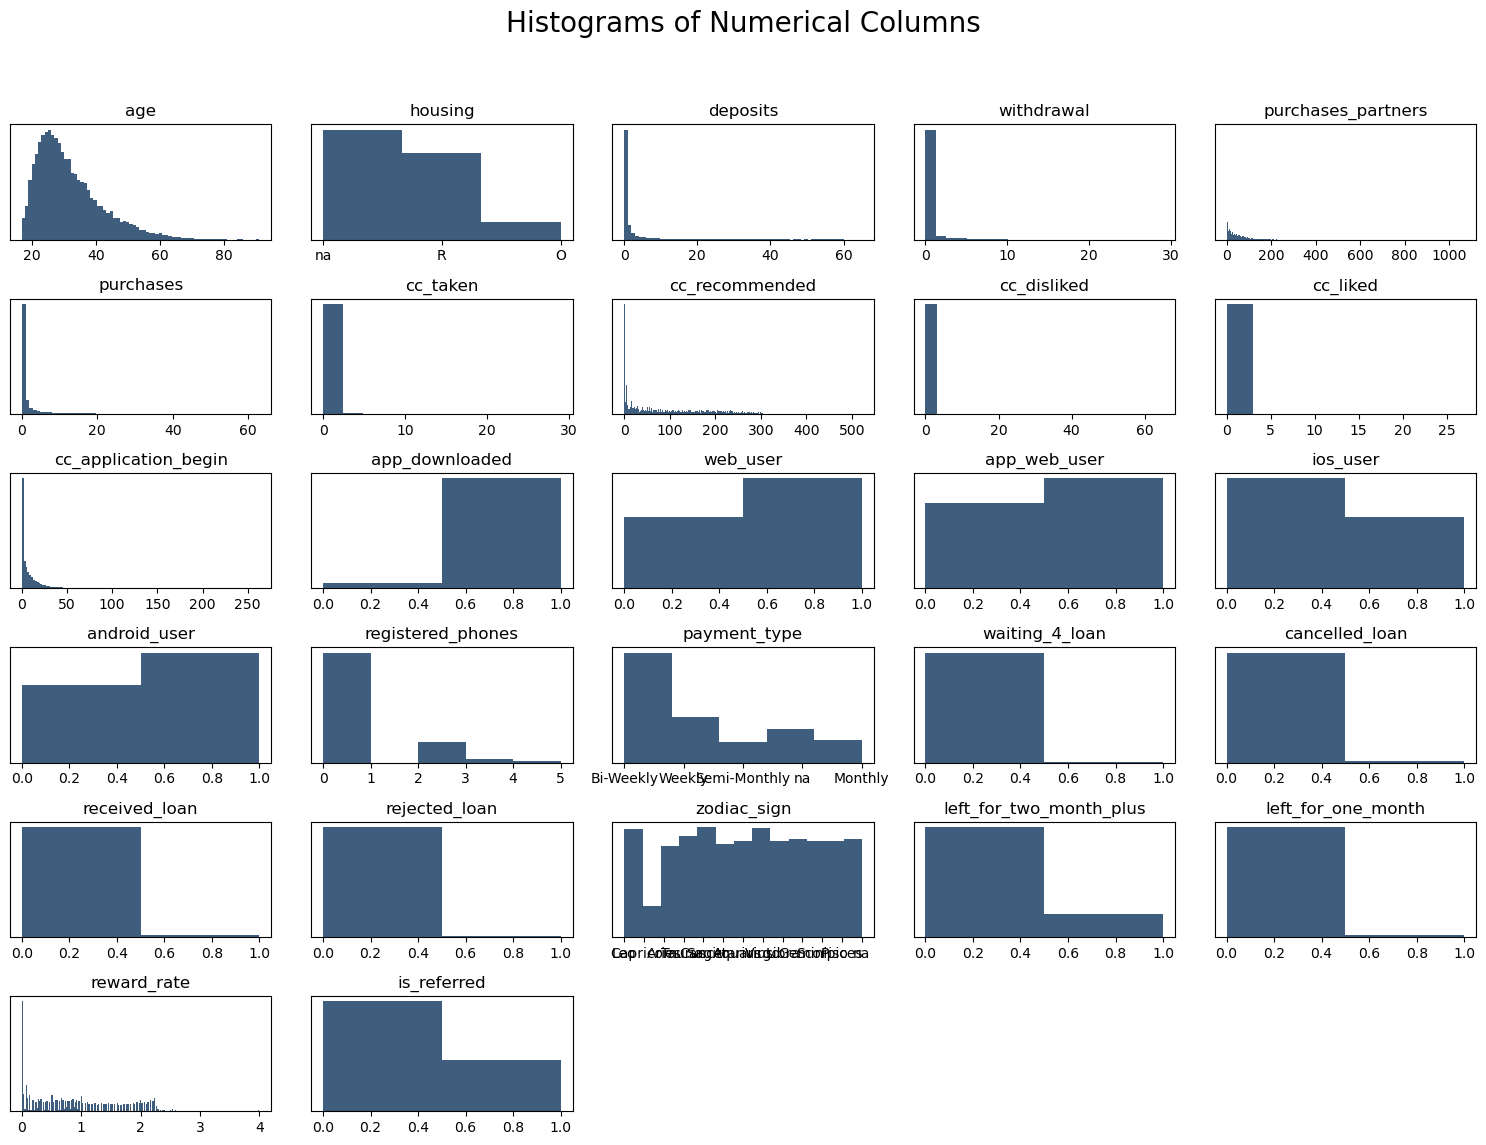

In [23]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

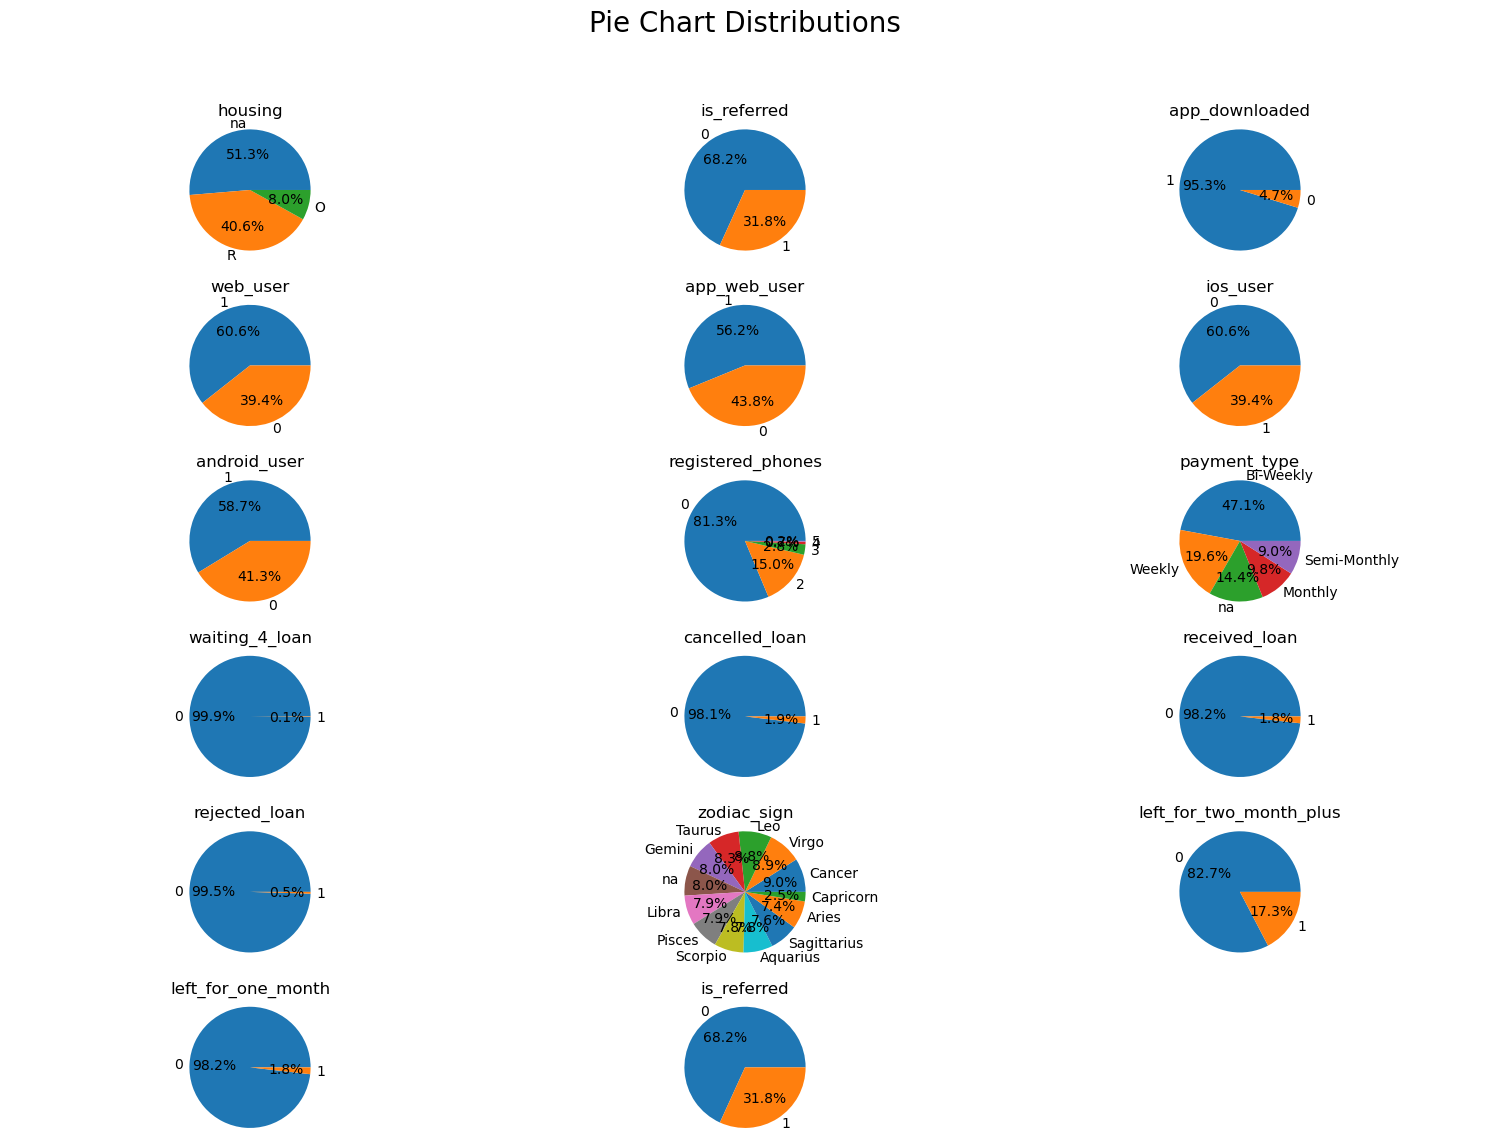

In [24]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<Axes: title={'center': 'Simple Correlation Level'}>

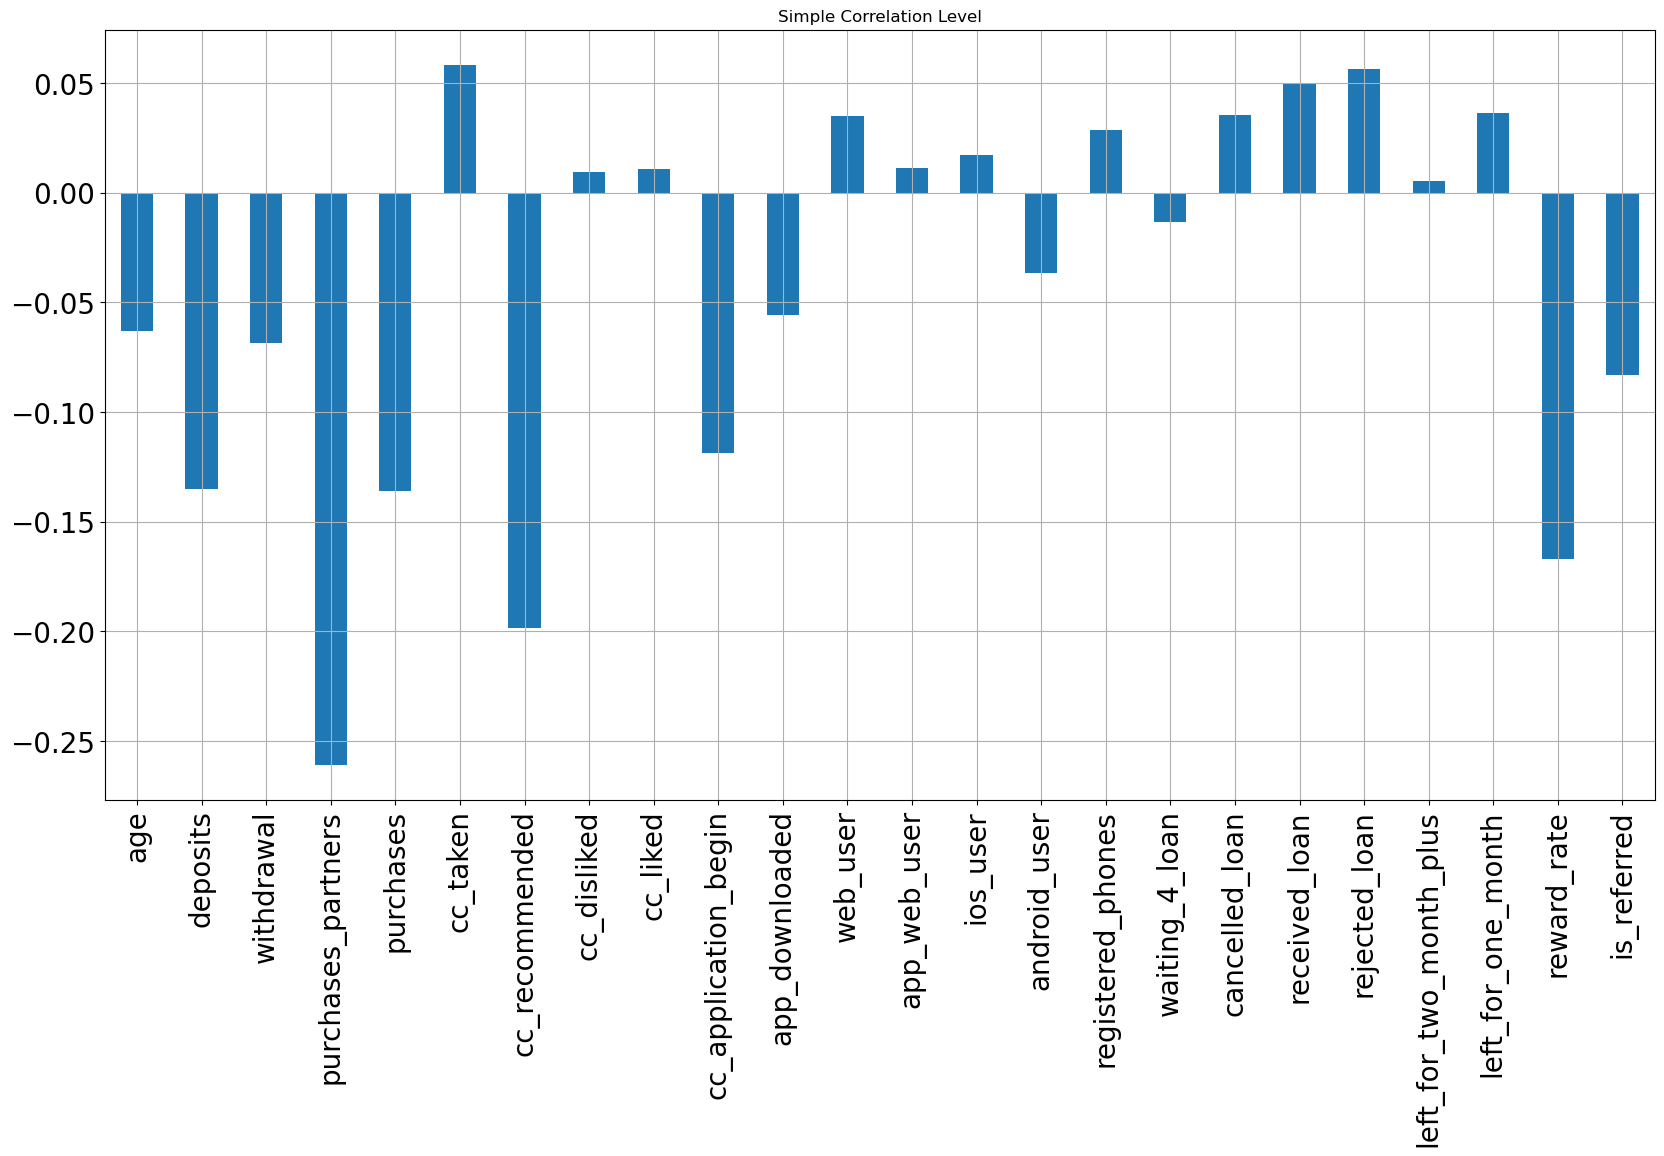

In [25]:
a = dataset.drop(columns = ['churn', 'user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn)
a.plot.bar(figsize = (20,10), title = 'Simple Correlation Level'
          ,fontsize = 20, grid = True)

/var/folders/_q/68cxyz453_n8p8rwl3q1yt6w0000gn/T/ipykernel_42662/356443857.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.drop(columns = ['user', 'churn']).corr()


<Axes: >

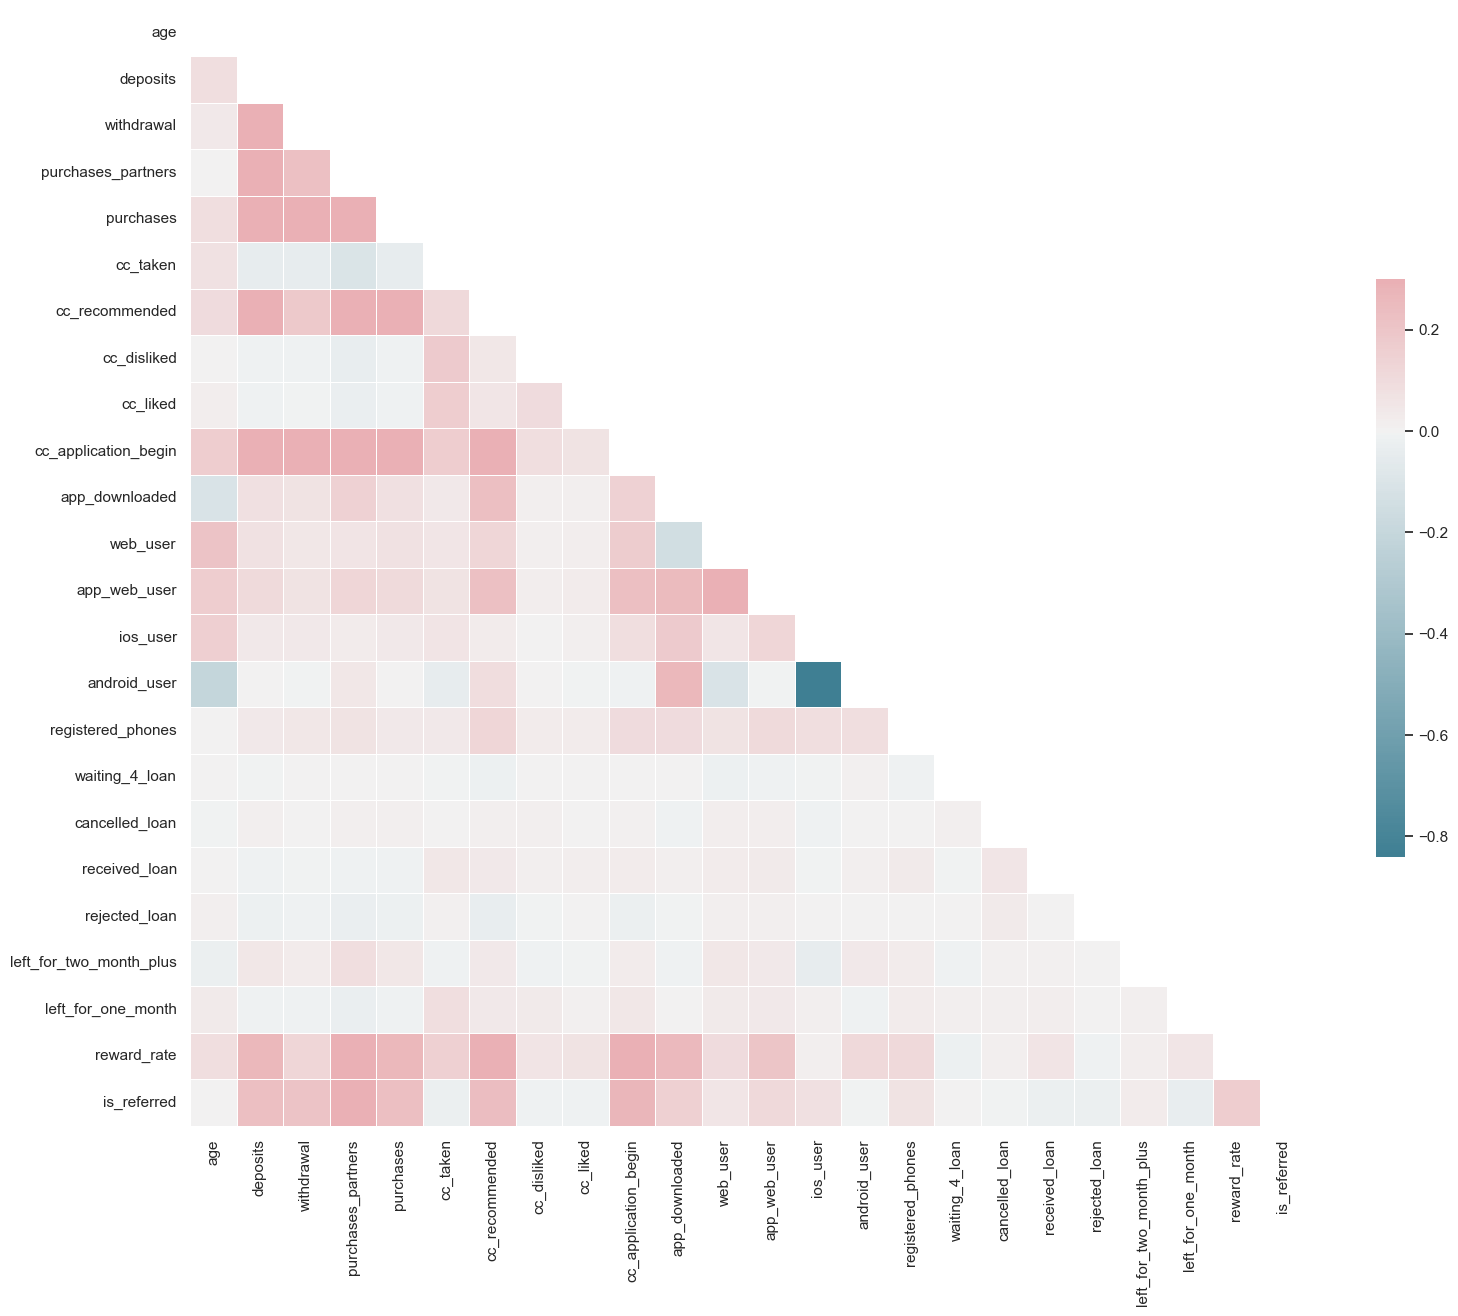

In [28]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
dataset = dataset.drop(columns = ['app_web_user'])

In [30]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [31]:
dataset.to_csv('new_churn_data.csv',index = False)

# Creating Logistic Regression Model
1. Data preparation
2. Extracting the user_id
3. One-Hot Endocing
-> pd.get_dummies
4. Split the data for training and test
- Balancing the Training Set
- Feature Scaling
5. Assessment
6. Improvement

In [32]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv('new_churn_data.csv')

In [39]:
dataset

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26991,1,24.0,R,0,0,0,0,0,81,0,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26992,1,26.0,na,0,0,2,0,0,1,0,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26993,0,22.0,na,0,0,37,0,0,98,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26994,1,46.0,na,2,0,16,2,0,58,0,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [35]:
user_id = dataset.user

In [38]:
dataset.drop(columns=['user'], inplace = True)

In [42]:
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [43]:
dataset = pd.get_dummies(dataset)

In [45]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],test_size = 0.2, random_state = 0)

In [ ]:
# Balancing the Training Set

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [ ]:
# Data Normalisation

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [ ]:
# Creating Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Assess the Model

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
# K-Cross Check

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

In [ ]:
# RFE

pd.concat([pd.DataFrame(X_train.columns, columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns = ['coef'])], axis = 1)
from sklearn.feature_selection import RFE
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
best_col = X_train.columns[rfe.support_]

In [ ]:
# Improvement

classifier = LogisticRegression()
classifier.fit(X_train[best_col], y_train)
y_pred = classifier.predict(X_test[best_col])

In [ ]:
# Final result

final_result = pd.concat([y_test, user_id], axis = 1).dropna()
final_result['predicted_churn'] = y_pred
final_result[['user', 'churn', 'predicted_churn']].reset_index(drop=True)